In [125]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from tabulate import tabulate


% matplotlib inline


### Data Cleaning (2008 data)

In [5]:
smoke08 = pd.read_csv('CDBRFS08.csv')
smoke08.head()

/Users/A123/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,x.state,x.geostr,x.denstr2,precall,repnum,repdepth,fmonth,idate,imonth,...,x.csexg.,x.craceg.,x.cageg.,x.rawch,x.wt2ch,x.postch,x.rawhh,x.wt2hh,x.posthh,x.housewt
0,1,1,1,1,1,1001,12,1,1022008,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.331675,4.695688,255.12457
1,2,1,1,1,1,1001,16,1,1022008,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.331675,4.695688,255.12457
2,3,1,1,1,1,1001,19,1,1142008,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.331675,4.695688,255.12457
3,4,1,1,1,1,1001,30,1,1022008,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.331675,4.695688,255.12457
4,5,1,1,1,1,1002,1,1,1072008,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.331675,4.695688,255.12457


In [ ]:
#import pprint
#pprint.pprint(list(smoke08.columns))

In [47]:
smoke08sub = smoke08[['x.rfsmok3', 'checkup1', 'x.state', 'age', 'sex', 'x.incomg']]
smoke08sub.rename(columns={'x.rfsmok3':'smoke_status', 'checkup1':'routine_checkup', 
                           'x.state':'state', 'x.incomg':'income'}, inplace=True)
smoke08sub.head()

/Users/A123/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,smoke_status,routine_checkup,state,age,sex,income
0,1,1,1,82,2,1
1,1,3,1,65,2,1
2,2,7,1,48,2,9
3,1,3,1,61,1,5
4,1,4,1,26,1,5


In [57]:
smoke08sub.shape

(357353, 6)

In [49]:
smoke08sub = smoke08sub.replace({8:5})
smoke08sub = smoke08sub[(smoke08sub['routine_checkup']<6) & (smoke08sub['income']<6)]   
smoke08sub.head()

,smoke_status,routine_checkup,state,age,sex,income
0,1,1,1,82,2,1
1,1,3,1,65,2,1
3,1,3,1,61,1,5
4,1,4,1,26,1,5
5,1,1,1,42,1,5


Note: Data Dictionary:
* Label:
    * smoke_status: Adults who are current smokers
            1:NO
            2:YES
        
* Features:
    * routine_checkup: how long has it been since you last visited a doctor for a routine checkup
            1: Within past year (anytime less than 12 months ago)
            2: Within past 2 years (1 year but less than 2 years ago)
            3: Within past 5 years (2 years but less than 5 years ago)
            4: 5 or more years ago
            7: Don’t know/Not sure
            8: Never
            9: Refused
    * x.state: State FIPS Code 
    * age
    * sex:
            1: Male
            2: Female
    * x.incomg: INCOME CATEGORY
            1: Less than $15,000
            2: $15,000 to less than $25,000
            3: $25,000 to less than $35,000
            4: $35,000 to less than $50,000
            5: $50,000 or more
            9: Don’t know/Not sure/Missing

In [74]:
smoke08sub.head()

,smoke_status,routine_checkup,state,age,sex,income
0,1,1,1,82,2,1
1,1,3,1,65,2,1
3,1,3,1,61,1,5
4,1,4,1,26,1,5
5,1,1,1,42,1,5


/Users/A123/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


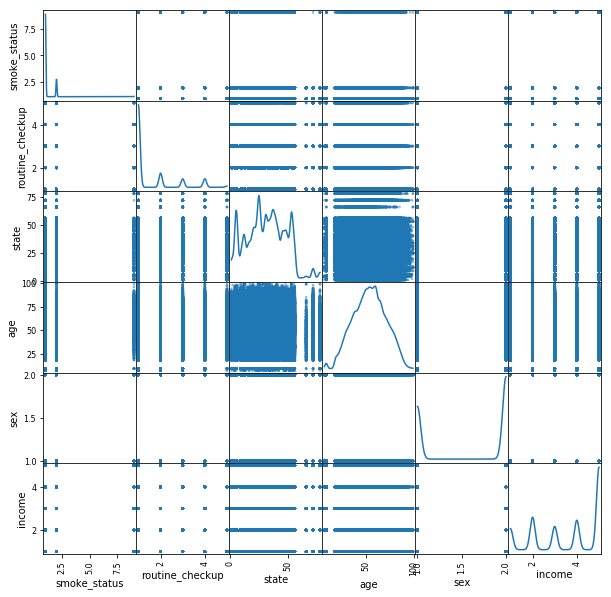

In [79]:
matrix = pd.scatter_matrix(smoke08sub, s=30, figsize=(10,10), diagonal='kde')

In [81]:
smoke = smoke08sub[smoke08sub['smoke_status']==2]
nonsmoke = smoke08sub[smoke08sub['smoke_status']==1]

### Get fitted algorithm using true data before intervention

In [59]:
ytrain = smoke08sub['smoke_status'].as_matrix(columns=None).astype(int)
xtrain = smoke08sub[['routine_checkup', 'state', 'age', 'sex', 'income']].as_matrix(columns=None).astype(int)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtarin, ytrain)

/Users/A123/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/A123/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### create fake dataframe by sampling with replacement
        * The interest feature here is 'routine_checkup'

In [63]:
xtrain

array([[ 1,  1, 82,  2,  1],
       [ 3,  1, 65,  2,  1],
       [ 3,  1, 61,  1,  5],
       ...,
       [ 1, 78, 45,  1,  2],
       [ 1, 78, 52,  2,  5],
       [ 1, 78, 38,  1,  2]])

In [64]:
np.random.seed(2018)
size = 300000
a0 = np.random.randint(0, max(smoke08sub['routine_checkup'])+1, size=size) #random generate routine_checkup
a1 = np.random.choice(xtarin[:size, 1], size=size, replace=True, p=None) #state
a2 = np.random.choice(xtarin[:size, 2], size=size, replace=True, p=None) #age
a3 = np.random.choice(xtarin[:size, 3], size=size, replace=True, p=None) #sex
a4 = np.random.choice(xtarin[:size, 4], size=size, replace=True, p=None) #income

In [67]:
simulated = pd.DataFrame(data=[a0, a1, a2, a3, a4])
xtest = np.transpose(simulated)

### Push simulated data to fitted algorithm, get conterfactual data

In [68]:
#conterfactual smoking status
ytest = rf.predict(xtest)

In [69]:
ytest

array([1, 2, 1, ..., 1, 2, 1])

### Get the true smoking status in 2010

In [84]:
smoke10 = pd.read_csv('CDBRFS10.csv', encoding='ISO-8859-1', error_bad_lines=False)

/Users/A123/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,53,389) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
smoke10.head()

,Unnamed: 0,x.state,x.geostr,x.denstr2,precall,repnum,repdepth,fmonth,idate,imonth,...,x.aidtst2,cpcounty,x.itscf1,x.itscf2,x.itspost,x.itsfinl,x.rawhh,x.wt2hh,x.posthh,x.housewt
0,1,1,9,2,1,120127,25,12,12302010,12,...,NaN,CLARKE3,3.351137e+06,88.799712,0.547504,48.618238,0.333333,18.012420,5.472875,98.579718
1,2,1,13,1,1,10170,26,1,2022010,2,...,NaN,colbert,3.351137e+06,326.702003,0.745529,243.565788,1.000000,33.134644,5.473992,181.378775
2,3,1,17,2,1,80197,23,8,8182010,8,...,NaN,housaton,3.351137e+06,189.479657,1.242380,235.405792,1.000000,38.434665,5.806179,223.158529
3,4,1,4,1,1,100041,19,10,11012010,11,...,NaN,jefferson,3.351137e+06,931.521484,0.883034,822.564903,1.000000,94.476411,5.270595,497.946881
4,5,1,13,1,1,120172,28,12,12302010,12,...,NaN,lauderdale,3.351137e+06,163.351001,0.702397,114.737225,1.000000,33.134644,5.473992,181.378775


In [107]:
ytrue = smoke10['x.rfsmok3'].as_matrix(columns=None).astype(int)
ytrue = np.transpose([ytrue])
ytrue = np.random.choice(ytrue[:size, 0], size=size, replace=True, p=None)

/Users/A123/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### Compare the predict data and the true data:

In [116]:
ytest

array([1, 2, 1, ..., 1, 2, 1])

In [115]:
ytrue

array([2, 1, 1, ..., 1, 2, 1])

In [123]:
cm = confusion_matrix(ytest, ytrue)
MSE = mean_squared_error(ytest, ytrue)
TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
TPR = TP / (TP + FN)
FPR = FP / (TN + FP)
ACC = (TN + TP) / (TN + FP + FN + TP)

table = [[" ","1", "2"],["1", TN, FN],["2", FP, TP]]
print("The confusion matrix is:")
#print(table)
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print()
print("The True Positive Rate is", TPR) 
print("The False Positive Rate is", FPR)
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤════════╤═══════╕
│   │   1    │   2   │
├───┼────────┼───────┤
│ 1 │ 217758 │ 32332 │
├───┼────────┼───────┤
│ 2 │ 41234  │ 6277  │
╘═══╧════════╧═══════╛

The True Positive Rate is 0.16257867336631354
The False Positive Rate is 0.15920955087415828
The Accuracy Rate is 0.7528032499890793
The Mean Squared Error is 0.7407066666666666
